In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tempfile


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from keras import regularizers, Model
from keras.utils import plot_model, to_categorical
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import Input, Dense, BatchNormalization, Dropout

In [2]:
plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [3]:
iris = load_iris()

In [4]:
X_train,X_test,y_train,y_test = train_test_split(iris.data, iris.target)

scaler = StandardScaler()
X_train_scld = scaler.fit_transform(X_train)
X_test_scld = scaler.transform(X_test)
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

In [5]:
input_layer= Input(shape=(iris.data.shape[1],))

x = Dense(12,activation="relu")(input_layer)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(9,activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(6,activation="relu")(x)

output = Dense(3, activation="softmax")(x)

model = Model(input_layer, output)

In [6]:
optimizer = Adam(learning_rate=1e-3)
model.compile(
    optimizer=optimizer, 
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 12)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 12)             │            48 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │           117 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 9)              │            36 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 9)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 342 (1.34 KB)

 Trainable params: 300 (1.17 KB)

 Non-trainable params: 42 (168.00 B)

In [7]:
early_stopping = EarlyStopping(
    monitor='accuracy',    
    patience=10,  
    restore_best_weights=True
)

In [8]:
history = model.fit(
    X_train_scld,
    y_train_cat,
    epochs=200,
    validation_split=0.3,
    batch_size=8,
    callbacks=[early_stopping]
)

Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.3848 - loss: 1.2305 - val_accuracy: 0.4706 - val_loss: 1.0797
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3608 - loss: 1.1380 - val_accuracy: 0.4412 - val_loss: 1.0626
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4799 - loss: 1.0238 - val_accuracy: 0.6471 - val_loss: 1.0463
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4766 - loss: 1.0495 - val_accuracy: 0.6471 - val_loss: 1.0304
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4295 - loss: 1.1077 - val_accuracy: 0.7059 - val_loss: 1.0130
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6278 - loss: 0.8981 - val_accuracy: 0.7647 - val_loss: 0.9958
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6996 - loss: 0.8921 - val_accuracy: 0.8235 - val_loss: 0.9777
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5537 - loss: 0.9217 - val_accuracy: 0.

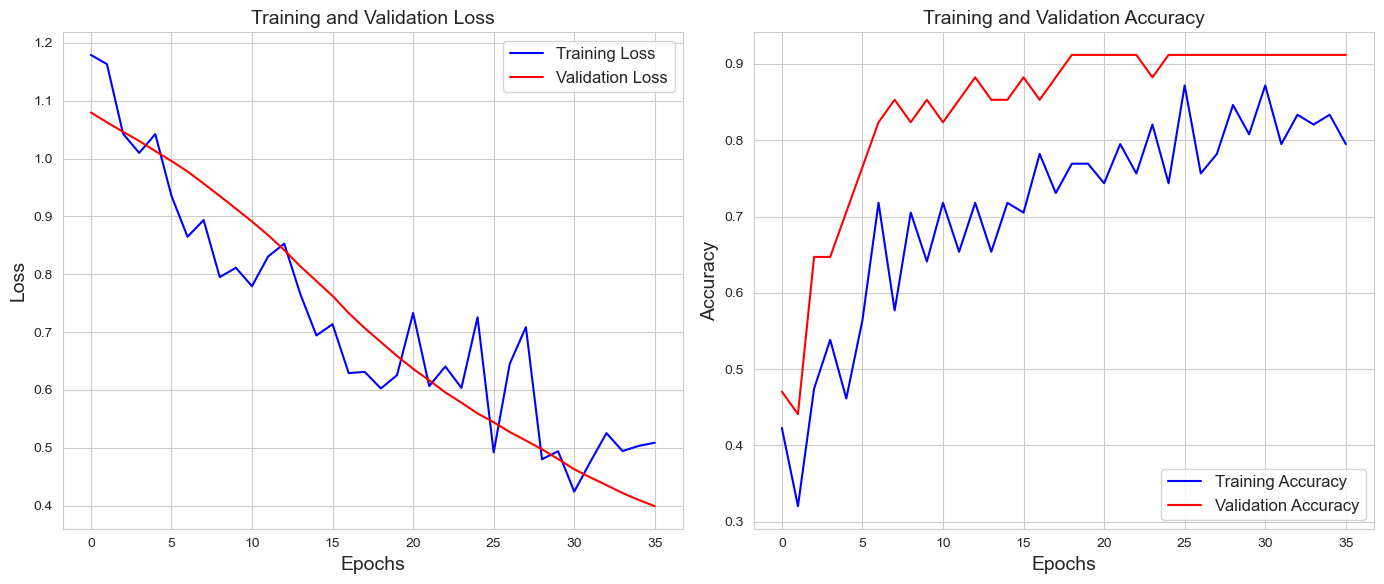

In [9]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']


_, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))


ax1.plot(loss, label='Training Loss',color='blue')
ax1.plot(val_loss, label='Validation Loss', color='red')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()


ax2.plot(accuracy, label='Training Accuracy', color='blue')
ax2.plot(val_accuracy, label='Validation Accuracy', color='red')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()

# Afficher les graphiques
plt.show()

In [10]:
model.evaluate(X_test_scld, y_test_cat, return_dict=True)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9265 - loss: 0.4294 


{'accuracy': 0.9210526347160339, 'loss': 0.4278930723667145}

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


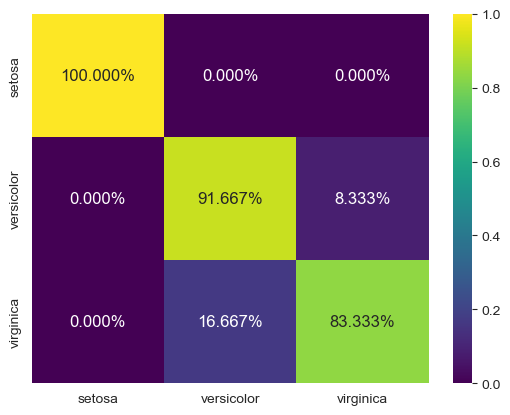

In [11]:
y_pred = np.argmax(model.predict(X_test_scld), axis=1) 
cm = confusion_matrix(y_test, y_pred, normalize='true')

sns.heatmap(
    cm,
    annot=True,
    fmt='.3%',              
    cmap='viridis',
    xticklabels=iris.target_names,
    yticklabels=iris.target_names
);